
## 1. Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Funções

In [ ]:
def importar_database(content):
  dados = pd.read_csv(content, encoding='latin1', sep=';', engine='python')
  return dados

# Modificando o dataset para que tenha apenas os acidentes com vítimas fatais
def filtro_dados_fatais(dados):
  dados_fatais = dados[dados['mortos'] > 0]
  return dados_fatais

# Eliminando as colunas que estão nulas e/ou não serão utilizadas no decorrer do projeto
def remover_colunas_nao_usadas(dados):
  dados_filtrados = dados.drop(['uso_solo', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'], axis=1)
  return dados_filtrados

# Verifica os valores únicos de cada coluna do dataset
def verificar_valores_unicos(dados):
  for coluna in dados.columns:
    valores_unicos = dados[coluna].unique()
    print(f'Coluna: {coluna}')
    print(f'Valores únicos ({len(valores_unicos)}): {valores_unicos}\n')

# Categoriza as causas dos acidentes em categorias
def categorizar_acidente(causa):
  if causa in falha_condutor:
      return 'Falha do Condutor'
  elif causa in falha_pedestre:
      return 'Falha do Pedestre'
  elif causa in fatores_externos:
      return 'Fatores Externos'
  elif causa in falha_mecanica:
      return 'Falha Mecânica'
  elif causa in problemas_via:
      return 'Problemas nas Vias'
  else:
      return 'Outros'

def categorizar_acidentes(dados):
  if 'causa_acidente' not in dados.columns:
      raise ValueError("A coluna 'causa_acidente' não está presente no DataFrame.")

  dados['categoria'] = dados['causa_acidente'].apply(categorizar_acidente)
  return dados

def porcentagem_acidentes_amplos(dados):
  contagem = dados['causa_acidente'].value_counts()
  porcentagem = (contagem / len(dados)) * 100
  return porcentagem

def porcentagem_categoria(dados):
  contagem = dados['categoria'].value_counts()
  porcentagem = (contagem / len(dados)) * 100
  return porcentagem

def filtro_semana(dados):
  semana = dados[dados['dia_semana'].isin(['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira'])]
  return semana

def filtro_final_semana(dados):
  finais_de_semana = dados[dados['dia_semana'].isin(['sexta-feira', 'sábado', 'domingo'])]
  return finais_de_semana

def filtrar_horario(dados):
  dados.loc[:, 'horario'] = dados['horario'].str[:2]
  return dados

def horarios_acidentes(dados):
  dados['horario'] = dados['horario'].astype(str).str[:2]
  dados['horario'] = pd.to_numeric(dados['horario'], errors='coerce')

def horarios_acidentes(dados):
  dados.loc[:, 'horario'] = dados['horario'].str[:2]
  contagem_hora_geral = dados['horario'].value_counts()
  dados_1 = contagem_hora_geral.sort_values(ascending=False)
  return dados_1

def condicao_metereologica(dados):
  meteorologia = dados["condicao_metereologica"].value_counts()
  return meteorologia.sort_values(ascending=False)


def plotar_graficos_comparacao_categorias(dados1, dados2):
  dados1 = dados1.sort_values(ascending=True)
  dados2 = dados2.sort_values(ascending=True)

# Criando subplots com 2 gráficos lado a lado
  fig, axes = plt.subplots(1, 2, figsize=(16, 8))

  axes[0].barh(dados1.index, dados1.values, color='#800000', zorder=2)  # Bordô com barras sobre a grade
  axes[0].set_title('Top 10 Causas de Acidentes - 2021', fontsize=16)
  axes[0].set_xlabel('Porcentagem (%)', fontsize=14)
  axes[0].set_ylabel('Causas', fontsize=14)
  axes[0].grid(True, color='lightgray', linestyle='--', linewidth=0.7, zorder=1)  # Grade cinza claro com traços

  axes[1].barh(dados2.index, dados2.values, color='#800000', zorder=2)
  axes[1].set_title('Top 10 Causas de Acidentes - 2022', fontsize=16)
  axes[1].set_xlabel('Porcentagem (%)', fontsize=14)
  axes[1].set_ylabel('Causas', fontsize=14)
  axes[1].grid(True, color='lightgray', linestyle='--', linewidth=0.7, zorder=1)

  plt.tight_layout()
  plt.show()



def plotar_graficos_comparacao_causas(dados1, dados2):

  top10_dados1 = dados1.nlargest(10).sort_values(ascending=True)
  top10_dados2 = dados2.nlargest(10).sort_values(ascending=True)

# Criar subplots com 2 gráficos, um abaixo do outro
  fig, axes = plt.subplots(2, 1, figsize=(12, 12))

  axes[0].barh(top10_dados1.index, top10_dados1.values, color='#800000')
  axes[0].set_title('Top 10 Causas de Acidentes - 2021', fontsize=16)
  axes[0].set_xlabel('Porcentagem (%)', fontsize=14)
  axes[0].set_ylabel('Causas', fontsize=14)
  axes[0].grid(True, color='lightgray', linestyle='--', linewidth=0.7, axis='x')
  axes[0].set_axisbelow(True)  # Garantir que a grid fique atrás das barras

  axes[1].barh(top10_dados2.index, top10_dados2.values, color='#800000')
  axes[1].set_title('Top 10 Causas de Acidentes - 2022', fontsize=16)
  axes[1].set_xlabel('Porcentagem (%)', fontsize=14)
  axes[1].set_ylabel('Causas', fontsize=14)
  axes[1].grid(True, color='lightgray', linestyle='--', linewidth=0.7, axis='x')
  axes[1].set_axisbelow(True)

  plt.tight_layout()
  plt.show()


def plotar_graficos_comparacao_horarios(dados1, dados2):
# Filtrar os top 10 horários para ambos os datasets
  top10_dados1 = dados1.nlargest(10).sort_values(ascending=True)
  top10_dados2 = dados2.nlargest(10).sort_values(ascending=True)

# Criar subplots com 2 gráficos, um abaixo do outro
  fig, axes = plt.subplots(2, 1, figsize=(12, 12))

  axes[0].barh(top10_dados1.index, top10_dados1.values, color='#800000')
  axes[0].set_title('Top 10 Horários - 2021', fontsize=16)
  axes[0].set_xlabel('Qtde', fontsize=14)
  axes[0].set_ylabel('Horários', fontsize=14)
  axes[0].grid(True, color='lightgray', linestyle='--', linewidth=0.7, axis='x')  # Linhas cinzas no fundo
  axes[0].set_axisbelow(True)  # Garantir que as linhas cinzas fiquem atrás das barras

  axes[1].barh(top10_dados2.index, top10_dados2.values, color='#800000')
  axes[1].set_title('Top 10 Horários - 2022', fontsize=16)
  axes[1].set_xlabel('Qtde', fontsize=14)
  axes[1].set_ylabel('Horários', fontsize=14)
  axes[1].grid(True, color='lightgray', linestyle='--', linewidth=0.7, axis='x')
  axes[1].set_axisbelow(True)

  plt.tight_layout()
  plt.show()

## 3. Importação dos Dados


In [ ]:
dados_2021 = importar_database('/content/datatran2021.csv')

In [ ]:
dados_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64568 entries, 0 to 64567
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      64568 non-null  float64
 1   data_inversa            64568 non-null  object 
 2   dia_semana              64568 non-null  object 
 3   horario                 64568 non-null  object 
 4   uf                      64568 non-null  object 
 5   br                      64568 non-null  int64  
 6   km                      64568 non-null  object 
 7   municipio               64568 non-null  object 
 8   causa_acidente          64568 non-null  object 
 9   tipo_acidente           64568 non-null  object 
 10  classificacao_acidente  64567 non-null  object 
 11  fase_dia                64568 non-null  object 
 12  sentido_via             64568 non-null  object 
 13  condicao_metereologica  64568 non-null  object 
 14  tipo_pista              64568 non-null

In [ ]:
dados_2022 = importar_database('/content/datatran2022.csv')

In [ ]:
dados_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64606 entries, 0 to 64605
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      64606 non-null  int64 
 1   data_inversa            64606 non-null  object
 2   dia_semana              64606 non-null  object
 3   horario                 64606 non-null  object
 4   uf                      64606 non-null  object
 5   br                      64606 non-null  int64 
 6   km                      64606 non-null  object
 7   municipio               64606 non-null  object
 8   causa_acidente          64606 non-null  object
 9   tipo_acidente           64606 non-null  object
 10  classificacao_acidente  64605 non-null  object
 11  fase_dia                64606 non-null  object
 12  sentido_via             64606 non-null  object
 13  condicao_metereologica  64606 non-null  object
 14  tipo_pista              64606 non-null  object
 15  tr

## 4. Análise Exploratória de 2021 e 2022


### Informações dos datasets

In [ ]:
dados_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64568 entries, 0 to 64567
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      64568 non-null  float64
 1   data_inversa            64568 non-null  object 
 2   dia_semana              64568 non-null  object 
 3   horario                 64568 non-null  object 
 4   uf                      64568 non-null  object 
 5   br                      64568 non-null  int64  
 6   km                      64568 non-null  object 
 7   municipio               64568 non-null  object 
 8   causa_acidente          64568 non-null  object 
 9   tipo_acidente           64568 non-null  object 
 10  classificacao_acidente  64567 non-null  object 
 11  fase_dia                64568 non-null  object 
 12  sentido_via             64568 non-null  object 
 13  condicao_metereologica  64568 non-null  object 
 14  tipo_pista              64568 non-null

In [ ]:
dados_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64606 entries, 0 to 64605
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      64606 non-null  int64 
 1   data_inversa            64606 non-null  object
 2   dia_semana              64606 non-null  object
 3   horario                 64606 non-null  object
 4   uf                      64606 non-null  object
 5   br                      64606 non-null  int64 
 6   km                      64606 non-null  object
 7   municipio               64606 non-null  object
 8   causa_acidente          64606 non-null  object
 9   tipo_acidente           64606 non-null  object
 10  classificacao_acidente  64605 non-null  object
 11  fase_dia                64606 non-null  object
 12  sentido_via             64606 non-null  object
 13  condicao_metereologica  64606 non-null  object
 14  tipo_pista              64606 non-null  object
 15  tr

### Limpeza e filtragem dos dados

In [ ]:
# Filtra os dados em acidentes nos quais houve vítimas fatais

dados_fatais_21 = filtro_dados_fatais(dados_2021)
dados_fatais_21.head(3)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
8,331864.0,2021-01-01,sexta-feira,17:10:00,SC,470,"79,1",INDAIAL,Transitar na contramão,Colisão frontal,...,1,0,1,6,4,"-26,951565","-49,306534",NaN,NaN,NaN
11,331920.0,2021-01-01,sexta-feira,20:40:00,PR,116,59,CAMPINA GRANDE DO SUL,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,1,1,0,3,"-25,30335724","-48,94378885",NaN,NaN,NaN
20,331990.0,2021-01-02,sábado,09:41:00,MG,381,"531,5",ITATIAIUCU,Condutor Dormindo,Saída de leito carroçável,...,0,0,0,1,1,"-20,18182886","-44,37895835",NaN,NaN,NaN


In [ ]:
dados_fatais_22 = filtro_dados_fatais(dados_2022)
dados_fatais_22.head(3)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
1,405158,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,0,1,1,2,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
7,405234,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,...,1,0,1,2,3,"-26,65043908","-53,5185463",SPRF-SC,DEL07-SC,UOP03-DEL07-SC
9,405254,2022-01-01,sábado,14:15:00,CE,116,"415,4",IPAUMIRIM,Manobra de mudança de faixa,Colisão frontal,...,0,1,3,0,5,"-6,741404","-38,792746",SPRF-CE,DEL05-CE,UOP01-DEL05-CE


In [ ]:
# Remove as colunas que não serão utilizadas na análise a seguir (latitude, longitude, regional, delegacia e uop)

dados_fatais_limpo_21 = remover_colunas_nao_usadas(dados_fatais_21)

In [ ]:
dados_fatais_limpo_22 = remover_colunas_nao_usadas(dados_fatais_22)

### Verificação das causas e divisão de categorias

In [ ]:
verificar_valores_unicos(dados_2021)

Coluna: id
Valores únicos (64568): [331730. 331804. 331815. ... 613470. 613705. 621196.]

Coluna: data_inversa
Valores únicos (365): ['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01-17' '2021-01-18' '2021-01-19' '2021-01-20'
 '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-24' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-14'
 '2021-02-15' '2021-02-16' '2021-02-17' '2021-02-18' '2021-02-19'
 '2021-02-20' '2021-02-21' '2021-02-22' '2021-02-23' '2021-02-24'
 '2021-02-25' '2021-02-26' '2021-02-27' '2021-02-28' '2021-03-01'
 '2021-03-02' '2021-03-03' '2021-03-04' '2021-03-05' '2021-03-06'
 '2021-03

In [ ]:
verificar_valores_unicos(dados_2022)

Coluna: id
Valores únicos (64606): [405151 405158 405172 ... 614646 617171 621057]

Coluna: data_inversa
Valores únicos (365): ['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10'
 '2022-01-11' '2022-01-12' '2022-01-13' '2022-01-14' '2022-01-15'
 '2022-01-16' '2022-01-17' '2022-01-18' '2022-01-19' '2022-01-20'
 '2022-01-21' '2022-01-22' '2022-01-23' '2022-01-24' '2022-01-25'
 '2022-01-26' '2022-01-27' '2022-01-28' '2022-01-29' '2022-01-30'
 '2022-01-31' '2022-02-01' '2022-02-02' '2022-02-03' '2022-02-04'
 '2022-02-05' '2022-02-06' '2022-02-07' '2022-02-08' '2022-02-09'
 '2022-02-10' '2022-02-11' '2022-02-12' '2022-02-13' '2022-02-14'
 '2022-02-15' '2022-02-16' '2022-02-17' '2022-02-18' '2022-02-19'
 '2022-02-20' '2022-02-21' '2022-02-22' '2022-02-23' '2022-02-24'
 '2022-02-25' '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01'
 '2022-03-02' '2022-03-03' '2022-03-04' '2022-03-05' '2022-03-06'
 '2022-03-07' '

In [ ]:
falha_condutor = [
    'Velocidade Incompatível', 'Transitar na contramão', 'Ausência de reação do condutor',
    'Reação tardia ou ineficiente do condutor', 'Ultrapassagem Indevida',
    'Acessar a via sem observar a presença dos outros veículos', 'Ingestão de álcool pelo condutor',
    'Manobra de mudança de faixa', 'Condutor Dormindo', 'Condutor deixou de manter distância do veículo da frente',
    'Desrespeitar a preferência no cruzamento', 'Transitar no acostamento', 'Conversão proibida',
    'Trafegar com motocicleta (ou similar) entre as faixas', 'Retorno proibido',
    'Condutor desrespeitou a iluminação vermelha do semáforo', 'Condutor usando celular',
    'Ingestão de substâncias psicoativas pelo condutor', 'Frear bruscamente', 'Estacionar ou parar em local proibido',
    'Transitar na calçada', 'Acesso irregular'
]

falha_pedestre = [
    'Pedestre andava na pista', 'Entrada inopinada do pedestre', 'Pedestre cruzava a pista fora da faixa',
    'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
    'Ingestão de álcool ou de substâncias psicoativas pelo pedestre',
    'Área urbana sem a presença de local apropriado para a travessia de pedestres'
]

fatores_externos = [
    'Animais na Pista', 'Chuva', 'Mal súbito do condutor', 'Demais Fenômenos da natureza', 'Fumaça', 'Neblina'
]

falha_mecanica = [
    'Demais falhas mecânicas ou elétricas', 'Problema com o freio', 'Carga excessiva e/ou mal acondicionada', 'Problema na suspensão'
]

problemas_via = [
    'Pista Escorregadia', 'Avarias e/ou desgaste excessivo no pneu', 'Iluminação deficiente',
    'Deficiência do Sistema de Iluminação/Sinalização', 'Objeto estático sobre o leito carroçável',
    'Curva acentuada', 'Ausência de sinalização', 'Acumulo de água sobre o pavimento', 'Pista esburacada',
    'Falta de acostamento', 'Afundamento ou ondulação no pavimento', 'Acostamento em desnível',
    'Sinalização mal posicionada', 'Falta de elemento de contenção que evite a saída do leito carroçável',
    'Demais falhas na via', 'Declive acentuado', 'Desvio temporário', 'Faixas de trânsito com largura insuficiente',
    'Acumulo de areia ou detritos sobre o pavimento', 'Pista em desnível', 'Obstrução na via',
    'Acumulo de óleo sobre o pavimento', 'Obras na pista', 'Sinalização encoberta',
    'Restrição de visibilidade em curvas horizontais', 'Restrição de visibilidade em curvas verticais'
]

In [ ]:
# Cria uma nova coluna no dataset com as categorias estabelecidas na função e mostra uma contagem da quantidade de dados em cada categoria

dados_fatais_atualizado_21 = categorizar_acidentes(dados_fatais_limpo_21)
display(dados_fatais_limpo_21['categoria'].value_counts())

,count
categoria,
Falha do Condutor,3382
Falha do Pedestre,729
Problemas nas Vias,277
Fatores Externos,207
Falha Mecânica,71


In [ ]:
dados_fatais_atualizado_22 = categorizar_acidentes(dados_fatais_limpo_22)
display(dados_fatais_limpo_22['categoria'].value_counts())

,count
categoria,
Falha do Condutor,3419
Falha do Pedestre,678
Problemas nas Vias,294
Fatores Externos,194
Falha Mecânica,77
Outros,2


### Porcentagem das categorias

In [ ]:
porcentagem_categoria(dados_fatais_limpo_21)

,count
categoria,
Falha do Condutor,72.481783
Falha do Pedestre,15.623661
Problemas nas Vias,5.936562
Fatores Externos,4.436348
Falha Mecânica,1.521646


In [ ]:
porcentagem_categoria(dados_fatais_limpo_22)

,count
categoria,
Falha do Condutor,73.306175
Falha do Pedestre,14.536878
Problemas nas Vias,6.303602
Fatores Externos,4.159520
Falha Mecânica,1.650943
Outros,0.042882


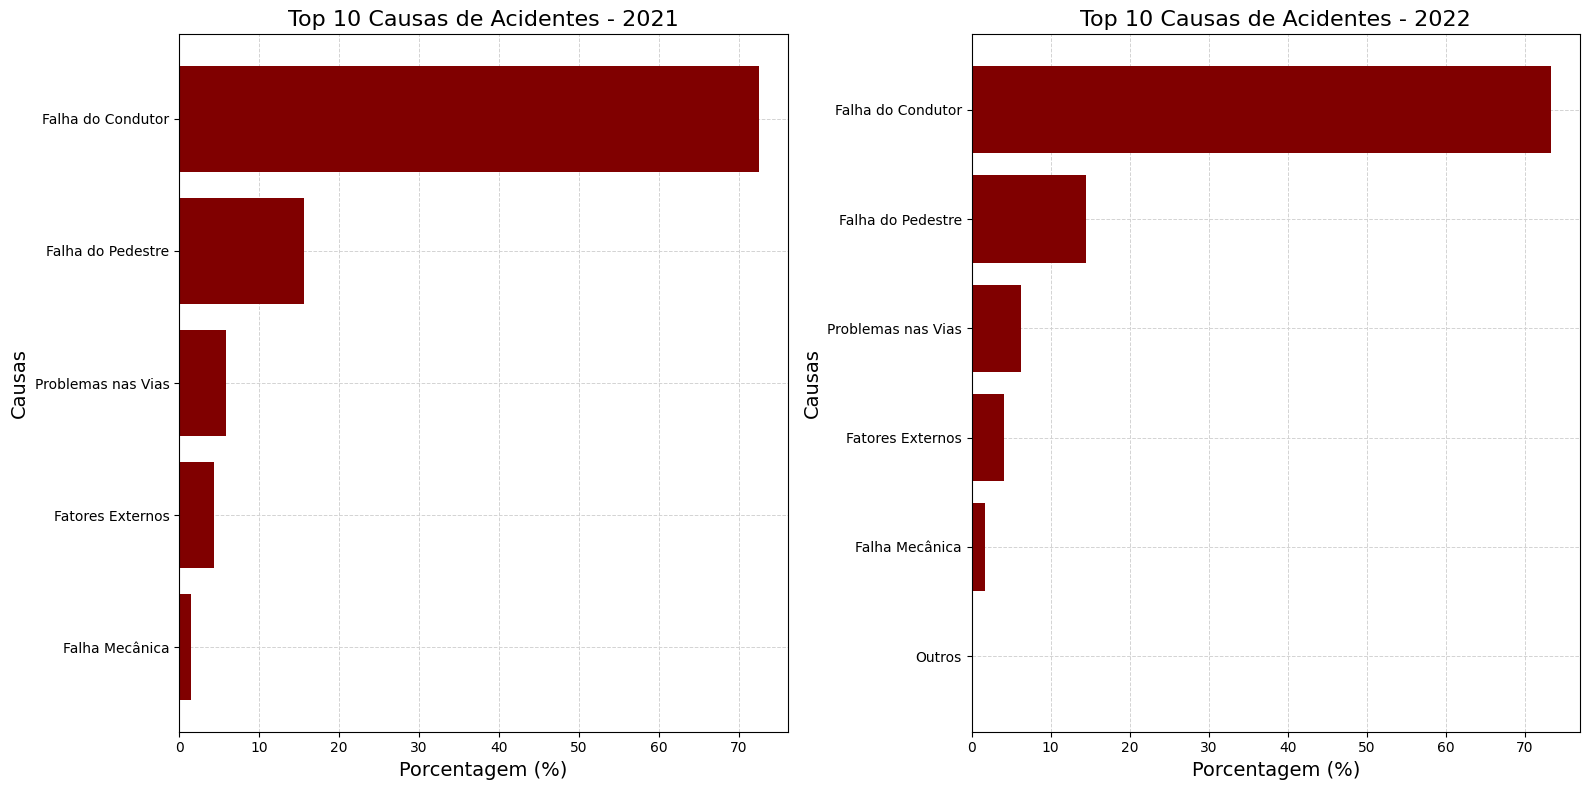

In [ ]:
# Gráfico
plotar_graficos_comparacao_categorias(porcentagem_categoria(dados_fatais_limpo_21), porcentagem_categoria(dados_fatais_limpo_22))

### Porcentagem das causas

In [ ]:
porcentagem_acidentes_amplos(dados_fatais_limpo_21)

,count
causa_acidente,
Velocidade Incompatível,12.237462
Transitar na contramão,10.972996
Ausência de reação do condutor,8.529790
Reação tardia ou ineficiente do condutor,7.865409
Pedestre andava na pista,6.536648
...,...
Fumaça,0.021432
Restrição de visibilidade em curvas verticais,0.021432
Problema na suspensão,0.021432


In [ ]:
porcentagem_acidentes_amplos(dados_fatais_limpo_22)

,count
causa_acidente,
Transitar na contramão,13.293310
Reação tardia ou ineficiente do condutor,10.591767
Ausência de reação do condutor,9.884220
Velocidade Incompatível,8.790738
Acessar a via sem observar a presença dos outros veículos,6.925386
...,...
Sinalização mal posicionada,0.042882
Fumaça,0.021441
Faixas de trânsito com largura insuficiente,0.021441


In [ ]:
import matplotlib.pyplot as plt





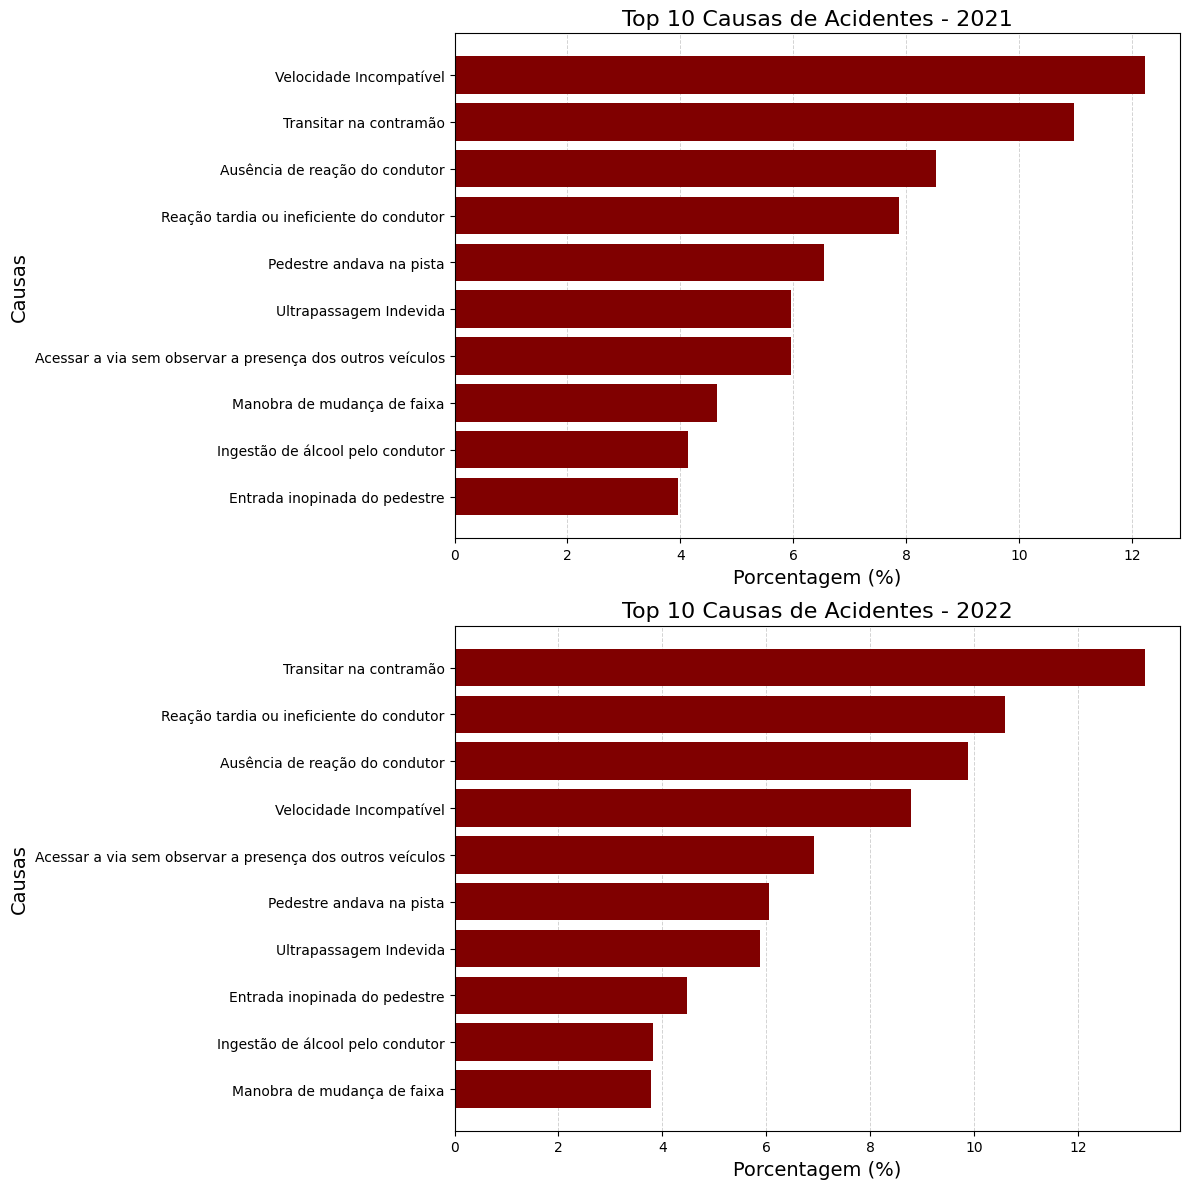

In [ ]:
plotar_graficos_comparacao_causas(porcentagem_acidentes_amplos(dados_fatais_limpo_21), porcentagem_acidentes_amplos(dados_fatais_limpo_22))

### Verificação dos acidentes na semana e finais de semana

#### Filtro Semana e Fim de Semana

In [ ]:
# Filtrando os dados por final de semana (sexta, sábado e domingo)

finais_semana_21 = filtro_final_semana(dados_fatais_atualizado_21)
finais_semana_21.shape[0]

2501

In [ ]:
finais_semana_22 = filtro_final_semana(dados_fatais_atualizado_22)
finais_semana_22.shape[0]

2488

In [ ]:
# Filtrando os dados por dias da semana (segunda, terça, quarta e quinta)

semana_21 = filtro_semana(dados_fatais_atualizado_21)
semana_21.shape[0]

2165

In [ ]:
semana_22 = filtro_semana(dados_fatais_atualizado_22)
semana_22.shape[0]

2176

#### Horários com maior incidência de acidentes - Geral

In [ ]:
horarios_acidentes(dados_fatais_limpo_21)

,count
horario,
18,407
19,391
20,318
21,256
17,234
16,225
22,219
23,189
05,181


In [ ]:
horarios_acidentes(dados_fatais_limpo_22)

,count
horario,
19,421
18,378
20,298
17,237
21,226
22,221
23,212
06,206
15,203


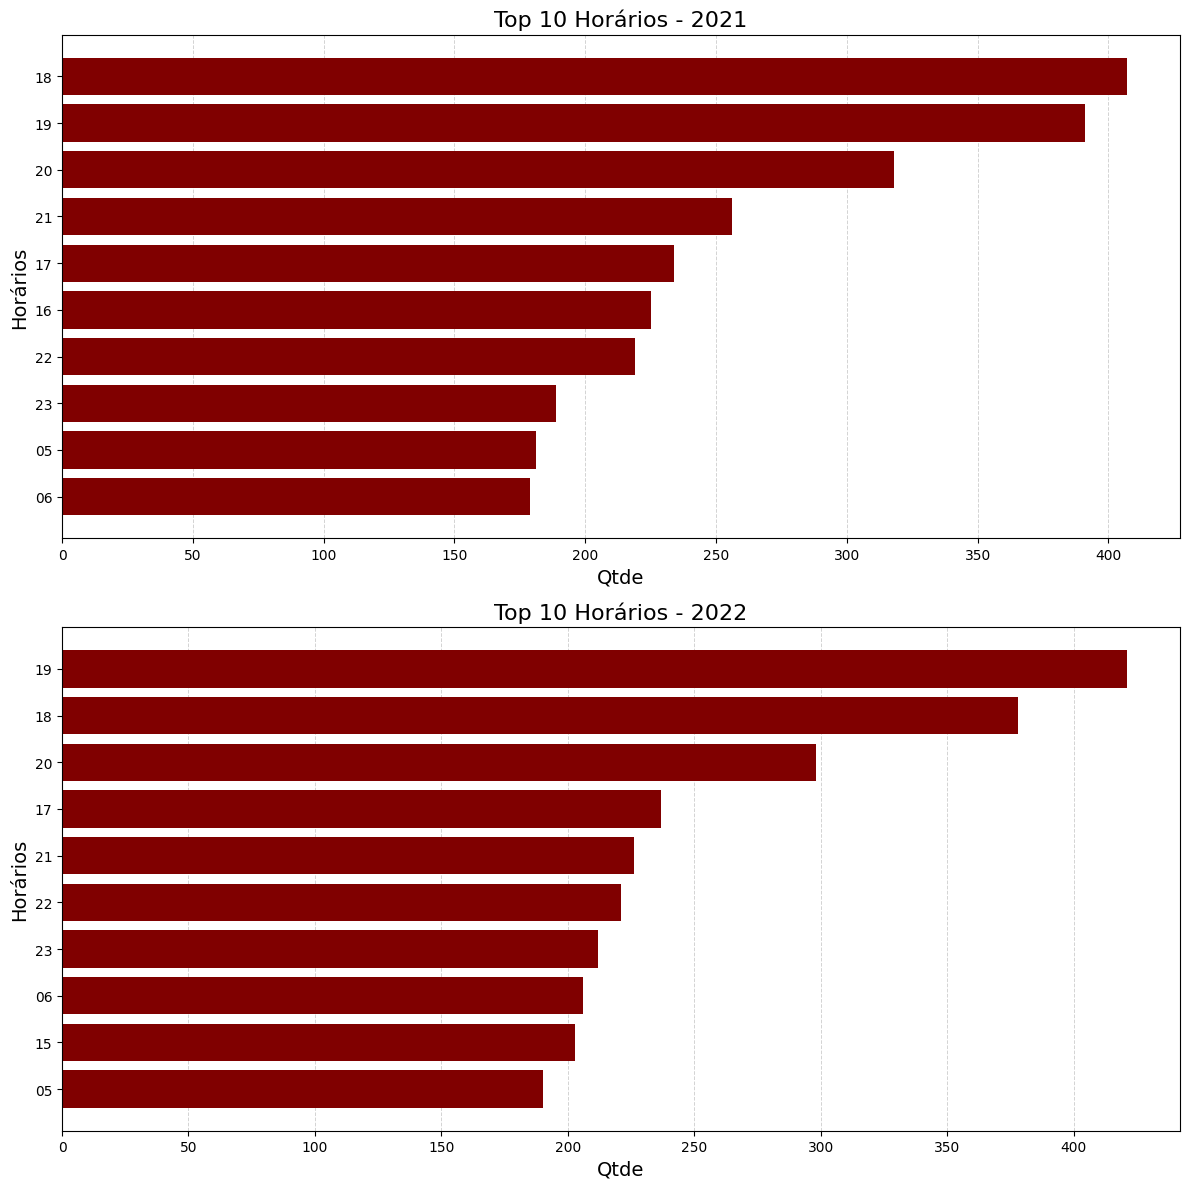

In [ ]:
plotar_graficos_comparacao_horarios(horarios_acidentes(dados_fatais_limpo_21), horarios_acidentes(dados_fatais_limpo_22))

#### Horários com maior incidência de acidentes - finais de semana




In [ ]:
horarios_acidentes(finais_semana_21)

,count
horario,
18,228
19,225
20,188
21,150
22,130
16,121
23,119
17,115
05,100


In [ ]:
horarios_acidentes(finais_semana_22)

,count
horario,
19,234
18,188
20,163
22,135
23,130
17,125
21,124
05,118
04,105


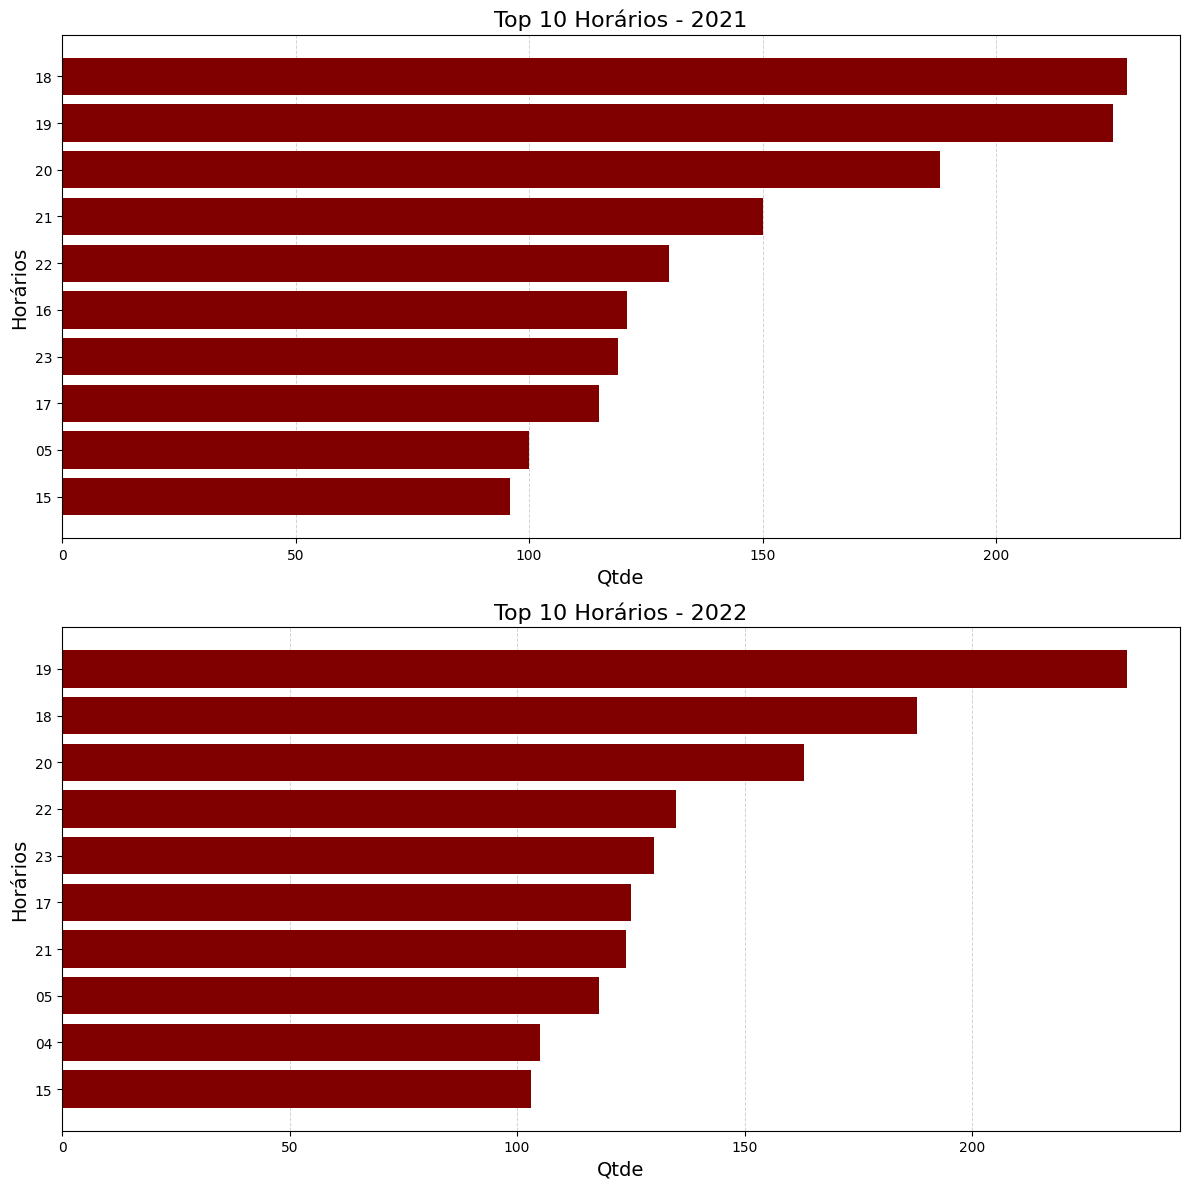

In [ ]:
plotar_graficos_comparacao_horarios(horarios_acidentes(finais_semana_21), horarios_acidentes(finais_semana_22))

#### Horários com maior incidência de acidentes - semana

In [ ]:
horarios_acidentes(semana_21)

,count
horario,
18,179
19,166
20,130
17,119
21,106
16,104
06,102
07,100
22,89


In [ ]:
horarios_acidentes(semana_22)

,count
horario,
18,190
19,187
20,135
17,112
06,108
07,103
21,102
15,100
12,92


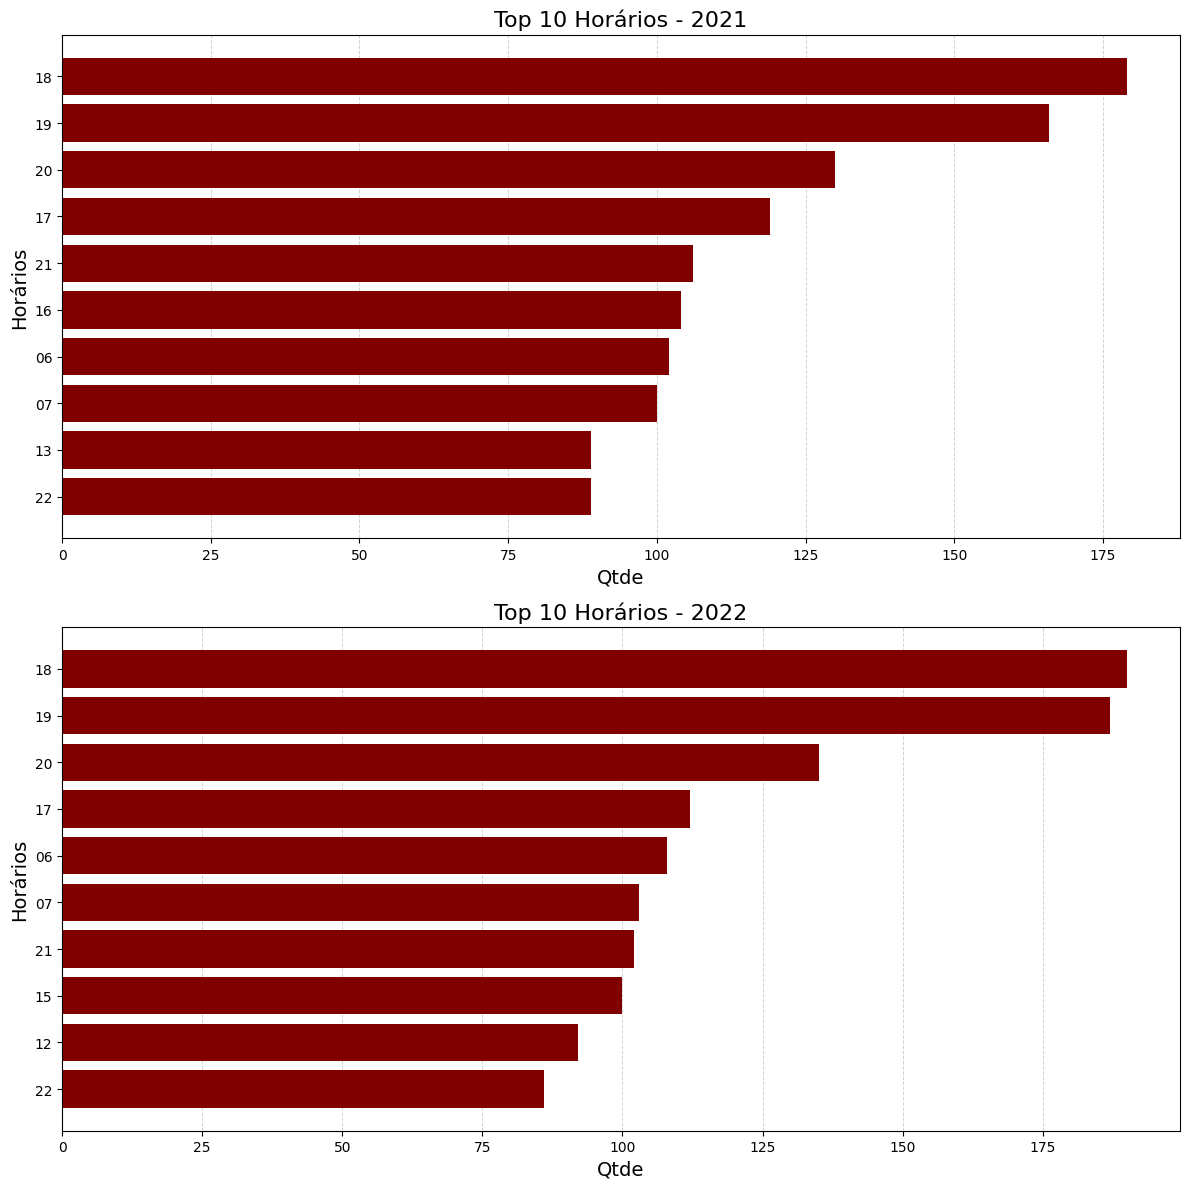

In [ ]:
plotar_graficos_comparacao_horarios(horarios_acidentes(semana_21), horarios_acidentes(semana_22))

#### Porcentagem das categorias - finais de semana e semana

In [ ]:
porcentagem_categoria(finais_semana_21)

,count
categoria,
Falha do Condutor,74.530188
Falha do Pedestre,14.474210
Problemas nas Vias,5.757697
Fatores Externos,4.198321
Falha Mecânica,1.039584


In [ ]:
porcentagem_categoria(finais_semana_22)

,count
categoria,
Falha do Condutor,74.638264
Falha do Pedestre,13.826367
Problemas nas Vias,6.149518
Fatores Externos,4.059486
Falha Mecânica,1.245981
Outros,0.080386


In [ ]:
porcentagem_categoria(semana_21)

,count
categoria,
Falha do Condutor,70.115473
Falha do Pedestre,16.951501
Problemas nas Vias,6.143187
Fatores Externos,4.711316
Falha Mecânica,2.078522


In [ ]:
porcentagem_categoria(semana_22)

,count
categoria,
Falha do Condutor,71.783088
Falha do Pedestre,15.349265
Problemas nas Vias,6.479779
Fatores Externos,4.273897
Falha Mecânica,2.113971


#### Causas - finais de semana e semana

In [ ]:
porcentagem_acidentes_amplos(finais_semana_21)

,count
causa_acidente,
Velocidade Incompatível,12.594962
Transitar na contramão,12.235106
Ausência de reação do condutor,9.036385
Reação tardia ou ineficiente do condutor,7.836865
Pedestre andava na pista,6.317473
Ultrapassagem Indevida,6.157537
Acessar a via sem observar a presença dos outros veículos,5.877649
Ingestão de álcool pelo condutor,5.237905
Manobra de mudança de faixa,4.558177


In [ ]:
porcentagem_acidentes_amplos(finais_semana_22)

,count
causa_acidente,
Transitar na contramão,14.991961
Reação tardia ou ineficiente do condutor,10.008039
Ausência de reação do condutor,9.766881
Velocidade Incompatível,9.163987
Acessar a via sem observar a presença dos outros veículos,6.310289
...,...
Deixar de acionar o farol da motocicleta (ou similar),0.040193
Problema na suspensão,0.040193
Participar de racha,0.040193


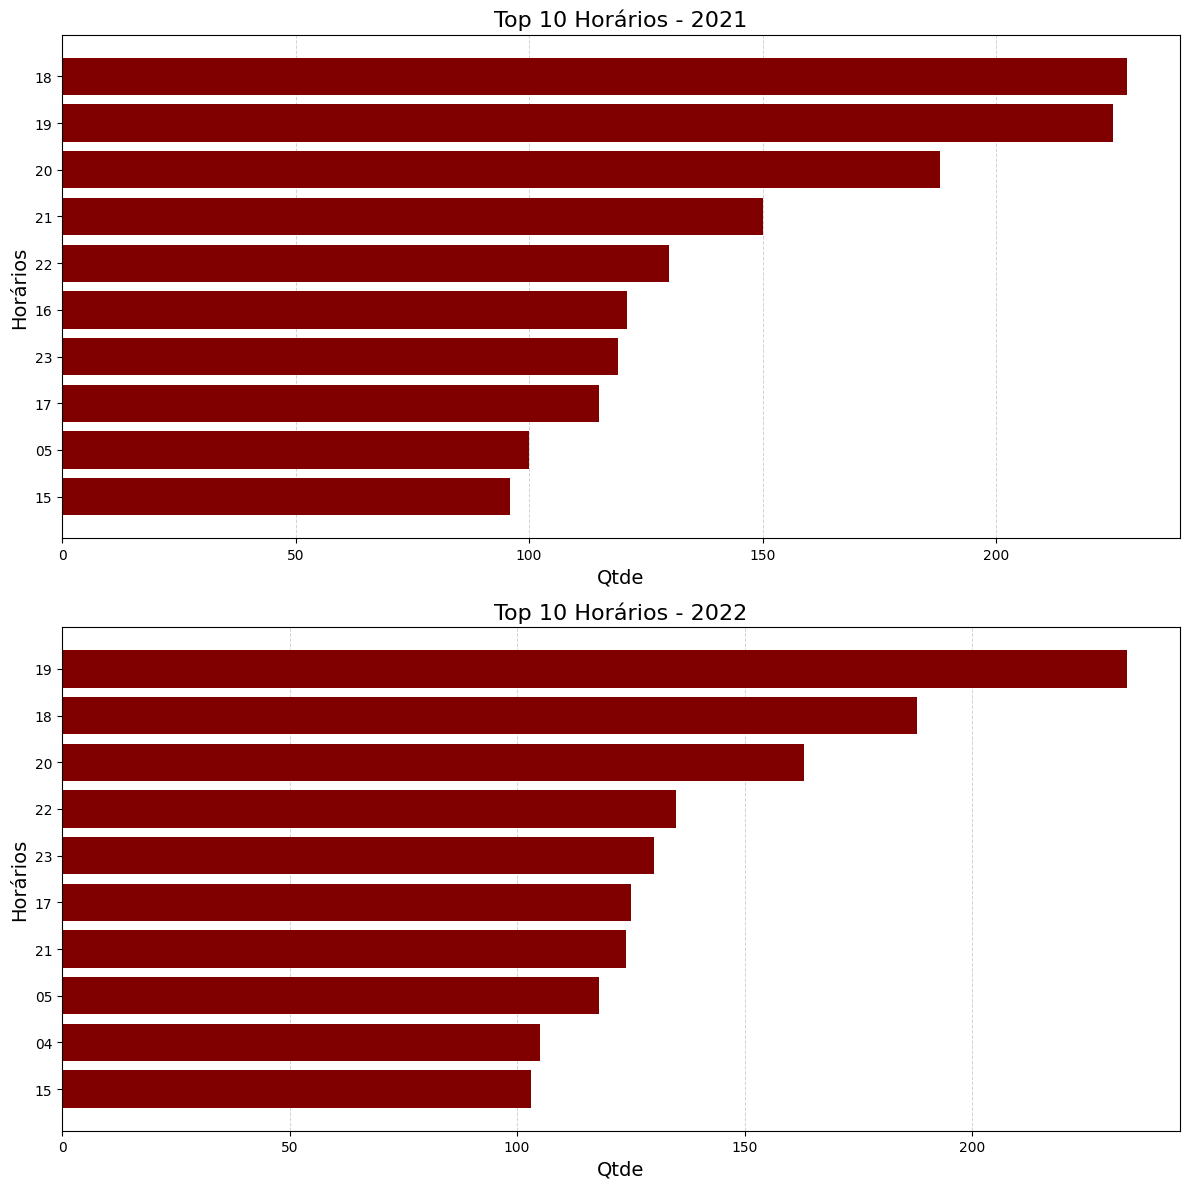

In [ ]:
plotar_graficos_comparacao_horarios(horarios_acidentes(finais_semana_21), horarios_acidentes(finais_semana_22))

In [ ]:
porcentagem_acidentes_amplos(semana_21)

,count
causa_acidente,
Velocidade Incompatível,11.824480
Transitar na contramão,9.515012
Ausência de reação do condutor,7.944573
Reação tardia ou ineficiente do condutor,7.898383
Pedestre andava na pista,6.789838
...,...
Demais Fenômenos da natureza,0.046189
Desvio temporário,0.046189
Declive acentuado,0.046189


In [ ]:
porcentagem_acidentes_amplos(semana_22)

,count
causa_acidente,
Transitar na contramão,11.351103
Reação tardia ou ineficiente do condutor,11.259191
Ausência de reação do condutor,10.018382
Velocidade Incompatível,8.363971
Acessar a via sem observar a presença dos outros veículos,7.628676
Pedestre andava na pista,6.112132
Ultrapassagem Indevida,6.066176
Entrada inopinada do pedestre,4.733456
Manobra de mudança de faixa,3.860294


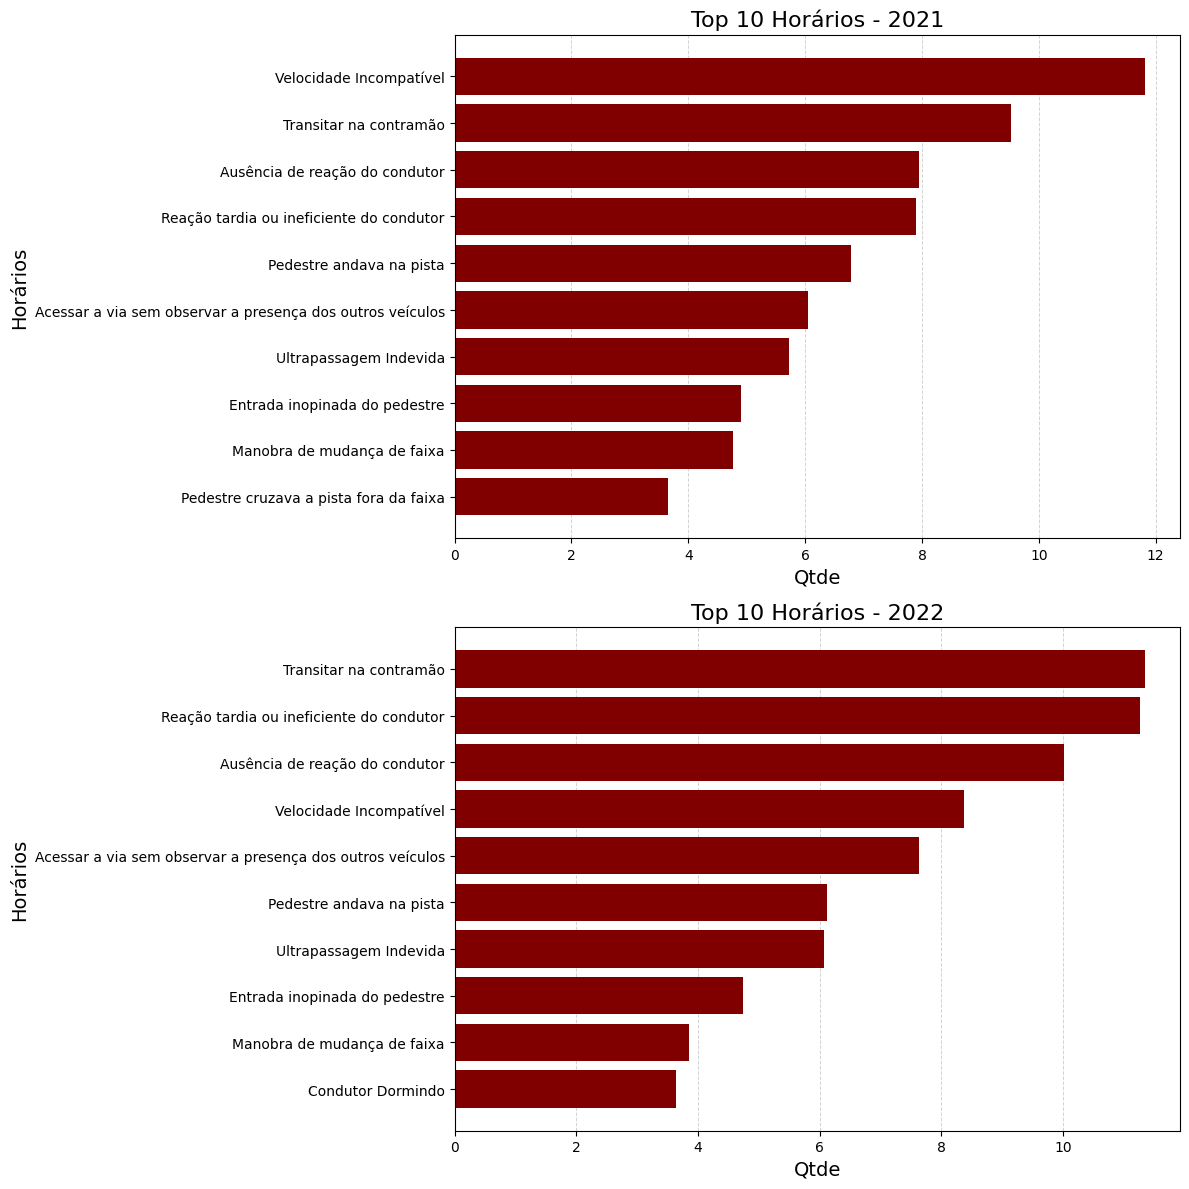

In [ ]:
plotar_graficos_comparacao_horarios(porcentagem_acidentes_amplos(semana_21), porcentagem_acidentes_amplos(semana_22))

#### Condições meteorológicas

In [ ]:
condicao_metereologica(finais_semana_21)

,count
condicao_metereologica,
Céu Claro,1572
Nublado,428
Chuva,245
Sol,113
Garoa/Chuvisco,60
Ignorado,47
Nevoeiro/Neblina,31
Vento,5


In [ ]:
condicao_metereologica(finais_semana_22)

,count
condicao_metereologica,
Céu Claro,1613
Nublado,394
Chuva,222
Sol,94
Garoa/Chuvisco,90
Ignorado,47
Nevoeiro/Neblina,24
Vento,4


In [ ]:
condicao_metereologica(semana_21)

,count
condicao_metereologica,
Céu Claro,1311
Nublado,376
Chuva,233
Sol,122
Garoa/Chuvisco,60
Nevoeiro/Neblina,30
Ignorado,27
Vento,6


In [ ]:
condicao_metereologica(semana_21)

,count
condicao_metereologica,
Céu Claro,1311
Nublado,376
Chuva,233
Sol,122
Garoa/Chuvisco,60
Nevoeiro/Neblina,30
Ignorado,27
Vento,6


### Distribuição de Horarios dos acidentes

In [ ]:
# Aplicar a função para adicionar a coluna de horas
df = horarios_acidentes(dados_fatais_limpo_21)

# Filtrar os acidentes entre 17h e 6h
# df_filtrado = df[(df['horario'] >= 17) | (df['horario'] < 6)]

# Plotar o gráfico de distribuição de horas
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='horario', palette='Blues')
plt.title('Distribuição de acidentes por horários 2021')
plt.xlabel('Hora do acidente')
plt.ylabel('Frequência')
plt.xticks(range(24))  # Para garantir que todas as horas apareçam
plt.show()